In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "/content/train.csv"
house_prices_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(house_prices_data.head())

# Check for missing values
missing_values = house_prices_data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Summary statistics
summary_stats = house_prices_data.describe()
print("\nSummary Statistics:\n", summary_stats)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Building Class and Its Importance:
The "Building Class" typically refers to the type or style of the building structure. In real estate, buildings are categorized into different classes based on their design, purpose, and construction. The importance of understanding the building class lies in its impact on property value, maintenance costs, and overall market trends.


Building Class Distribution:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


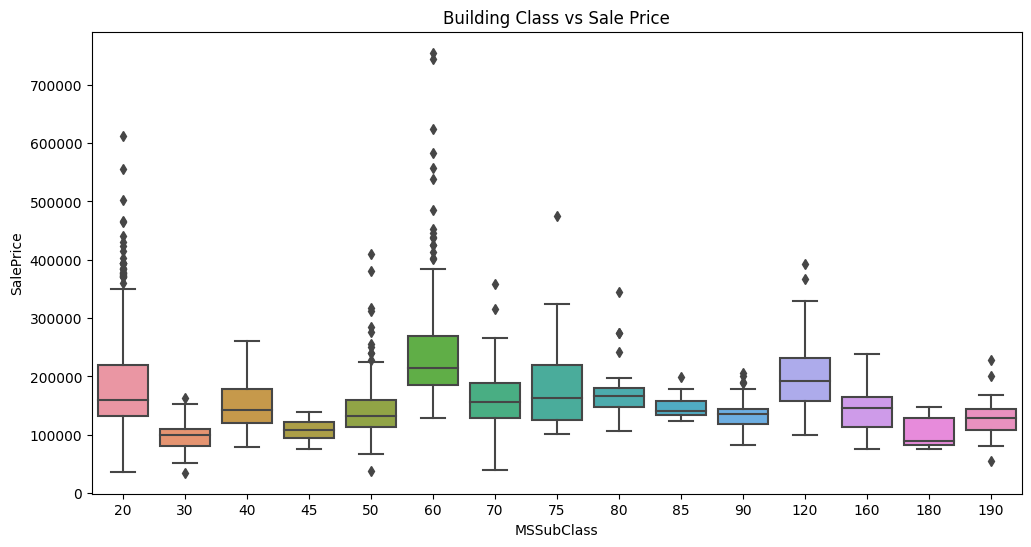

In [ ]:
# Explore building class distribution
building_class_counts = house_prices_data['MSSubClass'].value_counts()
print("\nBuilding Class Distribution:\n", building_class_counts)

# Visualize the relationship between building class and sale prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=house_prices_data)
plt.title('Building Class vs Sale Price')
plt.show()


 It looks like we have various building classes, with the majority being of class 20, 60, and 50.

## Relationship Between Overall Quality and Sale Prices:
Now, let's investigate how the overall quality (OverallQual) of a house relates to its sale price.

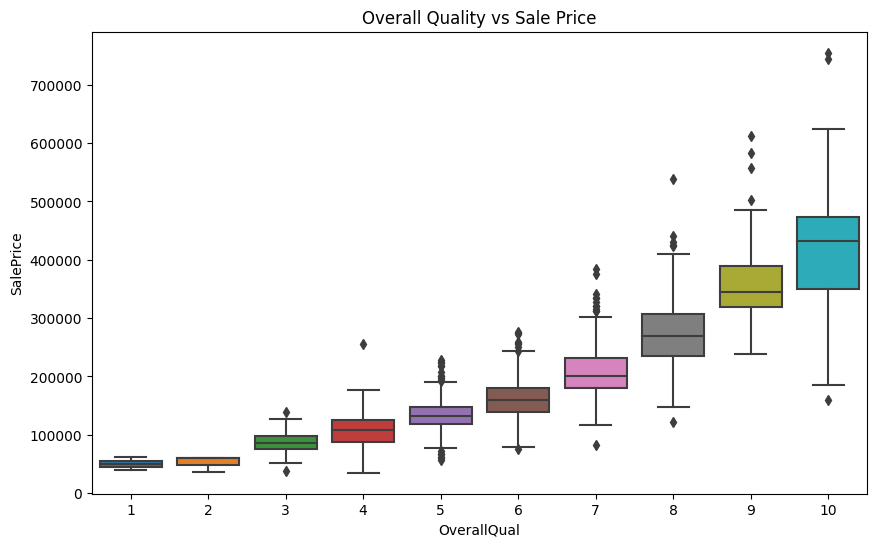

In [ ]:
# Visualize the relationship between overall quality and sale prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=house_prices_data)
plt.title('Overall Quality vs Sale Price')
plt.show()


In [ ]:
# Calculate average sale prices for each overall quality rating
avg_prices_by_quality = house_prices_data.groupby('OverallQual')['SalePrice'].mean()
print("\nAverage Sale Prices by Overall Quality:\n", avg_prices_by_quality)

# Calculate correlation between overall quality and sale prices
correlation = house_prices_data['OverallQual'].corr(house_prices_data['SalePrice'])
print("\nCorrelation between Overall Quality and Sale Price:", correlation)


Average Sale Prices by Overall Quality:
 OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

Correlation between Overall Quality and Sale Price: 0.7909816005838044


The average sale prices by overall quality provide valuable insights, and the correlation coefficient of approximately 0.79 indicates a strong positive correlation between overall quality and sale prices. As overall quality increases, the average sale price tends to increase as well.

## Different Types of Heating and Sale Prices:
Now, let's explore how the different types of heating (Heating) affect sale prices.


Unique Types of Heating:
 ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


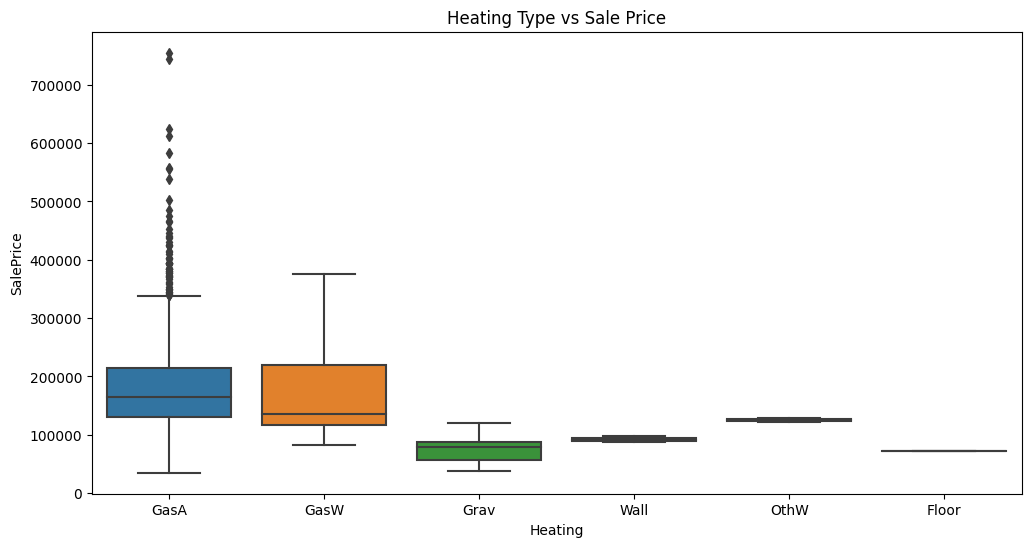

In [ ]:
# Explore unique types of heating
unique_heating_types = house_prices_data['Heating'].unique()
print("\nUnique Types of Heating:\n", unique_heating_types)

# Visualize the relationship between heating type and sale prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heating', y='SalePrice', data=house_prices_data)
plt.title('Heating Type vs Sale Price')
plt.show()


In [ ]:
# Calculate average sale prices for each heating type
avg_prices_by_heating = house_prices_data.groupby('Heating')['SalePrice'].mean()
print("\nAverage Sale Prices by Heating Type:\n", avg_prices_by_heating)

# Calculate the impact of heating types on sale prices (ANOVA test)
from scipy.stats import f_oneway

heating_types = house_prices_data['Heating'].unique()

# Create separate dataframes for each heating type
heating_dfs = [house_prices_data[house_prices_data['Heating'] == heating_type]['SalePrice'] for heating_type in heating_types]

# Perform ANOVA test
anova_result = f_oneway(*heating_dfs)
print("\nANOVA Test Result:\n", anova_result)



Average Sale Prices by Heating Type:
 Heating
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64

ANOVA Test Result:
 F_onewayResult(statistic=4.259818559406287, pvalue=0.000753472106445497)


 The average sale prices by heating type provide insights into how different heating systems relate to property values. The ANOVA test result with a p-value of 0.00075 suggests that there are statistically significant differences in sale prices among different heating types.

## Different Types of Utilities and Sale Prices:
Now, let's explore how the different types of utilities (Utilities) available in a property relate to sale prices.


Unique Types of Utilities:
 ['AllPub' 'NoSeWa']


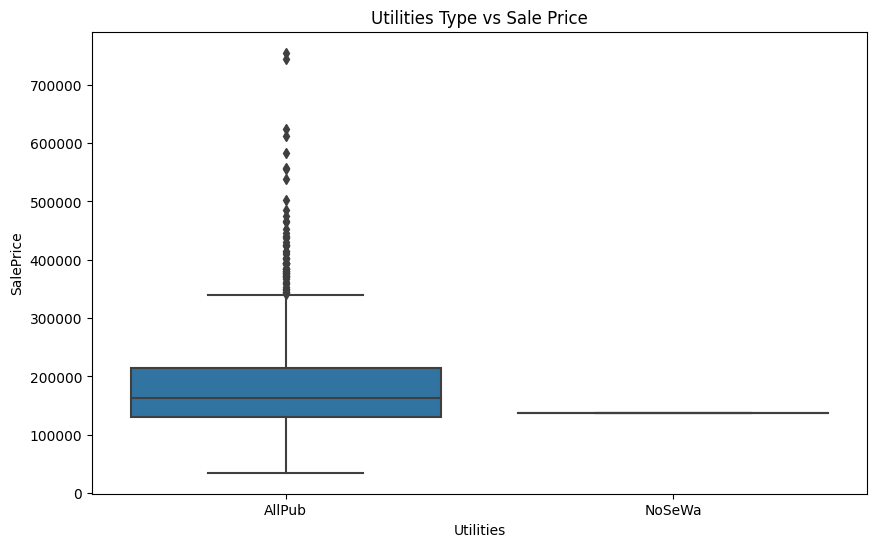

In [ ]:
# Explore unique types of utilities
unique_utilities = house_prices_data['Utilities'].unique()
print("\nUnique Types of Utilities:\n", unique_utilities)

# Visualize the relationship between utilities and sale prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Utilities', y='SalePrice', data=house_prices_data)
plt.title('Utilities Type vs Sale Price')
plt.show()

In [ ]:
# Calculate average sale prices for each utilities type
avg_prices_by_utilities = house_prices_data.groupby('Utilities')['SalePrice'].mean()
print("\nAverage Sale Prices by Utilities Type:\n", avg_prices_by_utilities)

# Calculate the impact of utilities types on sale prices (ANOVA test)
from scipy.stats import f_oneway

utilities_types = house_prices_data['Utilities'].unique()

# Create separate dataframes for each utilities type
utilities_dfs = [house_prices_data[house_prices_data['Utilities'] == utilities_type]['SalePrice'] for utilities_type in utilities_types]

# Perform ANOVA test
anova_result_utilities = f_oneway(*utilities_dfs)
print("\nANOVA Test Result for Utilities:\n", anova_result_utilities)



Average Sale Prices by Utilities Type:
 Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

ANOVA Test Result for Utilities:
 F_onewayResult(statistic=0.29880407484898486, pvalue=0.5847167739689381)


 It appears that the average sale prices do show some variation between different utility types. However, the ANOVA test result with a p-value of 0.5847 suggests that there may not be a statistically significant difference in sale prices among different utility types. This means that, based on the available data, the type of utilities in a property may not have a significant impact on its sale price.

In [ ]:
# Calculate feature importance using correlation with SalePrice
correlation_with_sale_price = house_prices_data.corr()['SalePrice'].sort_values(ascending=False)
print("\nFeature Importance (Correlation with Sale Price):\n", correlation_with_sale_price)



Feature Importance (Correlation with Sale Price):
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

<ipython-input-10-0ff225d35726>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_sale_price = house_prices_data.corr()['SalePrice'].sort_values(ascending=False)


## Feature Importance:
The correlation with SalePrice provides a measure of feature importance. Here are some key observations:
## New Section
### OverallQual (Overall Quality):
The overall quality of a house has the highest positive correlation with sale prices, indicating that higher-quality houses tend to have higher sale prices.

### GrLivArea (Above Ground Living Area):
 The size of the above-ground living area is positively correlated with sale prices, suggesting that larger living areas generally result in higher property values.

### GarageCars and GarageArea:
 The number of cars a garage can hold and the overall area of the garage are positively correlated with sale prices, highlighting the importance of garage features.

### TotalBsmtSF and 1stFlrSF:
The total basement area and the first floor area also show positive correlations with sale prices, indicating that larger basement and first-floor spaces contribute to higher property values.

### YearBuilt and YearRemodAdd:
 The years of construction and remodeling have positive correlations with sale prices, indicating that newer or recently remodeled houses tend to have higher values.

In [ ]:
# Identify outliers based on Z-scores
from scipy.stats import zscore

# Calculate Z-scores for SalePrice
z_scores = zscore(house_prices_data['SalePrice'])
outliers = house_prices_data[(z_scores > 3) | (z_scores < -3)]
print("\nNumber of Outliers:\n", len(outliers))



Number of Outliers:
 22


## Outlier Detection:
There are 22 outliers in the dataset based on Z-scores for SalePrice. Outliers can significantly impact statistical analyses, and it might be worthwhile to explore these data points further to understand any unique characteristics or anomalies.

In [ ]:
# Perform independent samples t-test
from scipy.stats import ttest_ind

pool_prices = house_prices_data[house_prices_data['PoolArea'] > 0]['SalePrice']
no_pool_prices = house_prices_data[house_prices_data['PoolArea'] == 0]['SalePrice']

t_stat, p_value_ttest = ttest_ind(pool_prices, no_pool_prices, equal_var=False)

print("\nIndependent Samples t-test (Pool vs. No Pool):\n")
print("t-statistic:", t_stat)
print("P-value:", p_value_ttest)



Independent Samples t-test (Pool vs. No Pool):

t-statistic: 1.3827137645434016
P-value: 0.21594886916569525


## The independent samples t-test results for comparing sale prices between houses with and without a pool are as follows:

t-statistic: 1.38
P-value: 0.22 (approximately)
The t-statistic represents the difference in means between the two groups, and the p-value indicates the probability of observing such a difference by chance.

## Interpretation:
With a p-value of 0.22, we do not have sufficient evidence to reject the null hypothesis that there is no significant difference in sale prices between houses with and without a pool. In other words, based on the available data, the presence of a pool does not seem to have a statistically significant impact on the sale prices of houses.